## Import Library

In [1]:
# Library untuk manipulasi dan analisis data
import pandas as pd
# Library untuk membuat visualisasi data (grafik statis)
import matplotlib.pyplot as plt
# Library untuk membuat visualisasi data yang lebih informatif dan estetis
import seaborn as sns
# Library untuk membagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
# Library untuk melakukan regresi linear
from sklearn.linear_model import LinearRegression
# Library untuk menghitung metrik evaluasi seperti Mean Squared Error (MSE) ,R-squared (R²), dan Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Library untuk mengambil dataset open source dari OpenML
from sklearn.datasets import fetch_openml
# Importing library statsmodels untuk analisis statistik
import statsmodels.api as sm
# Library untuk melakukan standarisasi data
from sklearn.preprocessing import StandardScaler

## Import Dataset

In [2]:
data = fetch_openml(name="boston", version=1, as_frame=True)
boston = data.frame
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Summarize Data

In [3]:
boston.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
PTRATIO,506.0,18.455534,2.164946,12.60000,17.400000,19.05000,20.200000,22.0000
B,506.0,356.674032,91.294864,0.32000,375.377500,391.44000,396.225000,396.9000


In [4]:
boston.shape

(506, 14)

In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [6]:
# Mengubah tipe data kolom 'CHAS' dari tipe data awal (kategori) menjadi tipe data float
boston['CHAS'] = boston['CHAS'].astype(float)

# Mengubah tipe data kolom 'RAD' dari tipe data awal (kategori) menjadi tipe data float
boston['RAD'] = boston['RAD'].astype(float)

In [7]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualisasi

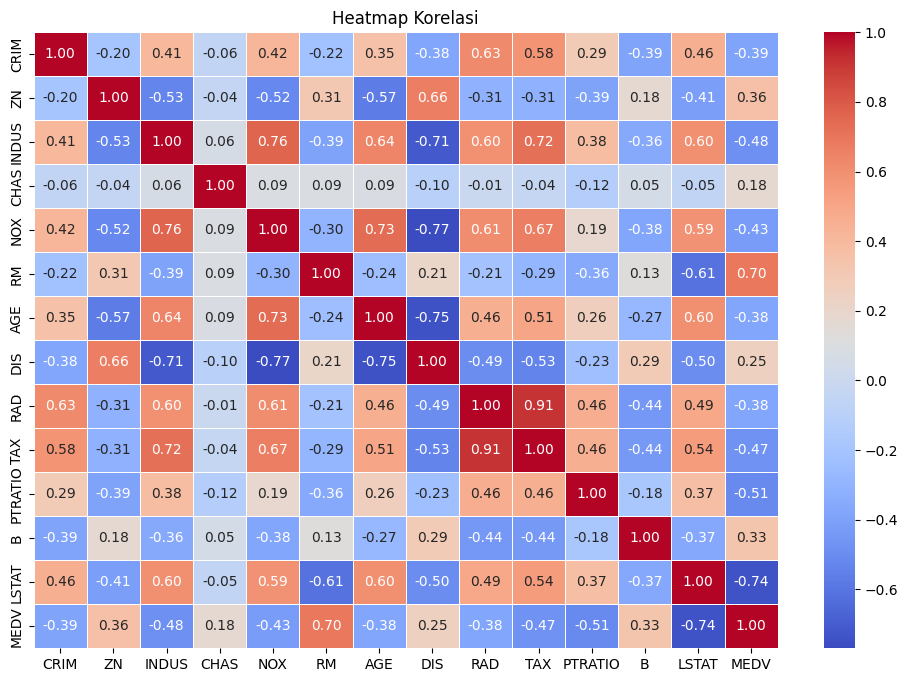

In [8]:
# Membuat figure atau gambar dengan ukuran 12x8 inci
plt.figure(figsize=(12, 8))

# Membuat heatmap untuk menunjukkan korelasi antara fitur-fitur dalam dataset boston
# boston.corr() menghitung korelasi antar kolom di dataset boston
# annot=True menampilkan nilai korelasi pada setiap sel di heatmap
# cmap='coolwarm' menentukan warna yang digunakan dalam heatmap, dari biru (negatif) hingga merah (positif)
# fmt='.2f' untuk menampilkan angka korelasi dengan dua angka desimal
# linewidths=0.5 untuk memberi garis pemisah antar sel pada heatmap
sns.heatmap(boston.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Menambahkan judul pada heatmap
plt.title('Heatmap Korelasi')

# Menampilkan heatmap
plt.show()

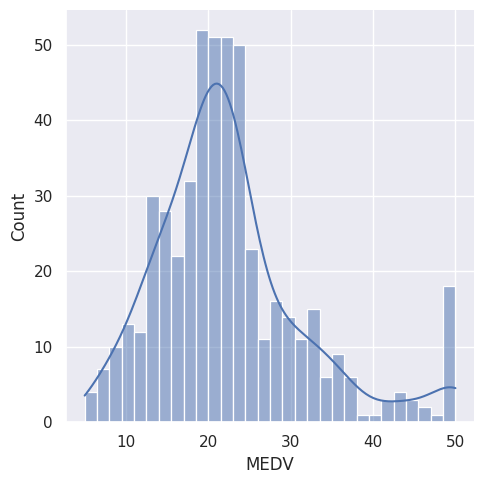

In [9]:
# Mengatur ukuran gambar dengan orientasi A4 (11.7 inci x 8.27 inci)
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Membuat plot distribusi untuk kolom 'MEDV' dari dataset boston menggunakan displot
# boston['MEDV'] berisi harga median rumah, yang akan divisualisasikan dalam bentuk distribusi
# bins=30 menentukan jumlah bin (kotak) dalam histogram untuk membagi data ke dalam 30 kategori
# kde=True menambahkan estimasi kepadatan kernel (KDE) pada distribusi, yang menunjukkan distribusi data secara halus
sns.displot(boston['MEDV'], bins=30, kde=True)

# Menampilkan plot
plt.show()

## Split Data

In [10]:
# Menghapus kolom 'MEDV' dari dataset boston untuk digunakan sebagai fitur (X) dan menjadikan 'MEDV' sebagai target (y)
# X berisi semua fitur, kecuali harga median rumah 'MEDV', yang akan digunakan untuk prediksi
# y berisi harga median rumah 'MEDV', yang menjadi target yang ingin diprediksi
X = boston.drop(columns=['MEDV'])
y = boston['MEDV']

# Menampilkan jumlah fitur (kolom) pada X
# X.shape[1] memberikan jumlah kolom pada X, yang merepresentasikan jumlah fitur
print("Jumlah fitur (X):", X.shape[1])

# Menampilkan jumlah data pada X (jumlah baris)
# X.shape[0] memberikan jumlah baris pada X, yang merupakan jumlah data
print("Jumlah data:", X.shape[0])

Jumlah fitur (X): 13
Jumlah data: 506


In [11]:
# Membagi dataset menjadi data latih (training) dan data uji (testing) menggunakan train_test_split
# X_train dan y_train adalah data latih yang digunakan untuk melatih model
# X_test dan y_test adalah data uji yang digunakan untuk mengevaluasi model
# test_size=0.2 berarti 20% data akan digunakan untuk data uji, sedangkan 80% untuk data latih
# random_state=42 memastikan pembagian data yang konsisten setiap kali kode dijalankan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan jumlah data latih (training) yang ada pada X_train
# X_train.shape[0] memberikan jumlah baris pada data latih
print("Jumlah data Train :")
print(X_train.shape[0])

# Menampilkan jumlah data uji (testing) yang ada pada X_test
# X_test.shape[0] memberikan jumlah baris pada data uji
print("Jumlah data Test :")
print(X_test.shape[0])

Jumlah data Train :
404
Jumlah data Test :
102


## Train Model

$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n
$

Di mana:
- $(y$) adalah variabel target (nilai yang ingin diprediksi, seperti harga rumah dalam kasus ini).
- $(\beta_0$) adalah **intersep** atau nilai prediksi ketika semua fitur \(X\) bernilai nol.
- $(\beta_1, \beta_2, \dots, \beta_n$) adalah **koefisien regresi** yang menunjukkan seberapa besar pengaruh masing-masing fitur terhadap variabel target \(y\).
- $(X_1, X_2, \dots, X_n$) adalah **fitur** (variabel input) yang digunakan untuk memprediksi nilai $(y$).

In [26]:
# Membuat objek model regresi linier dari kelas LinearRegression
# Model ini akan digunakan untuk memodelkan hubungan antara fitur (X) dan target (y)
model = LinearRegression()

# Melatih (fit) model dengan data latih (X_train, y_train)
# Proses ini menghitung koefisien (slope) dan intersep dari model regresi linier
model.fit(X_train, y_train)

# Menampilkan koefisien dari model regresi linier
# model.coef_ berisi nilai koefisien untuk setiap fitur (kolom) dalam X
# Koefisien ini menunjukkan seberapa besar pengaruh masing-masing fitur terhadap variabel target (y)
print("Koefisien (Beta_1, Beta_2, Beta_3):", model.coef_)

# Menampilkan intersep dari model regresi linier
# model.intercept_ berisi nilai intersep (Beta_0) dari regresi linier
# Intersep ini adalah nilai prediksi untuk y ketika semua fitur X bernilai 0
print("Intersep (Beta_0):", model.intercept_)

Koefisien (Beta_1, Beta_2, Beta_3): [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
Intersep (Beta_0): 30.24675099392366


## Evaluasi Model

$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$
Dimana:
   - $( y_i $) adalah nilai aktual untuk data ke-i.
   - $( \hat{y}_i $) adalah nilai prediksi untuk data ke-i.
   - $( n $) adalah jumlah total data.

$
   MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$
   Dimana:
   - $( y_i $) adalah nilai aktual untuk data ke-i.
   - $( \hat{y}_i $) adalah nilai prediksi untuk data ke-i.
   - $( n $) adalah jumlah total data.

$   
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$
   Dimana:
   - $( y_i $) adalah nilai aktual untuk data ke-i.
   - $( \hat{y}_i $) adalah nilai prediksi untuk data ke-i.
   - $( \bar{y} $) adalah rata-rata dari nilai aktual.
   - $( n $) adalah jumlah total data.


$
MAPE = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100\%
$
   Dimana:
   - $( y_i $) adalah nilai aktual untuk data ke-i.
   - $( \hat{y}_i $) adalah nilai prediksi untuk data ke-i.
   - $( n $) adalah jumlah total data.

In [27]:
# Menggunakan model yang sudah dilatih untuk membuat prediksi pada data uji (X_test)
# y_pred berisi hasil prediksi model berdasarkan data uji
y_pred = model.predict(X_test)

# Menghitung Mean Absolute Error (MAE)
# MAE mengukur rata-rata selisih absolut antara nilai yang diprediksi dan nilai aktual
# Semakin kecil MAE, semakin akurat model dalam memprediksi data
mae = mean_absolute_error(y_test, y_pred)

# Menghitung Mean Squared Error (MSE)
# MSE mengukur rata-rata kuadrat selisih antara nilai yang diprediksi dan nilai aktual
# MSE lebih sensitif terhadap outlier karena selisih dihitung kuadratnya
mse = mean_squared_error(y_test, y_pred)

# Menghitung R-squared (R^2)
# R^2 adalah ukuran seberapa baik model menjelaskan variasi dalam data target (y)
# Nilai R^2 berada di antara 0 dan 1, semakin mendekati 1 semakin baik model menjelaskan data
r2 = r2_score(y_test, y_pred)

# Menghitung Mean Absolute Percentage Error (MAPE)
# MAPE mengukur seberapa besar persentase kesalahan prediksi dibandingkan dengan nilai aktual
# Semakin kecil MAPE, semakin baik model dalam memprediksi data
mape = (abs((y_test - y_pred) / y_test).mean()) * 100

# Menampilkan hasil evaluasi model
# Menampilkan MAE, MSE, R-squared, dan MAPE untuk mengevaluasi performa model
print("Mean Absolute Error (MAE):", mae)  # Menampilkan nilai MAE
print("Mean Squared Error (MSE):", mse)  # Menampilkan nilai MSE
print("R-squared (R^2):", r2)  # Menampilkan nilai R^2
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))  # Menampilkan nilai MAPE dengan dua angka desimal

Mean Absolute Error (MAE): 3.189091965887837
Mean Squared Error (MSE): 24.291119474973478
R-squared (R^2): 0.6687594935356326
Mean Absolute Percentage Error (MAPE): 16.87%


## Model Diagnostics

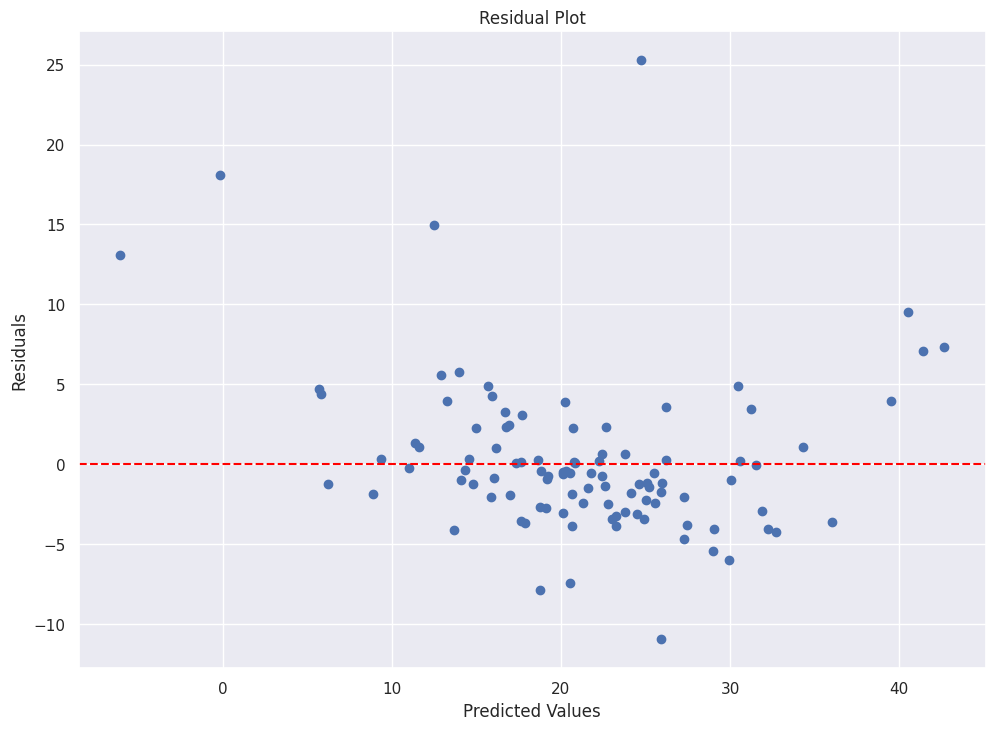

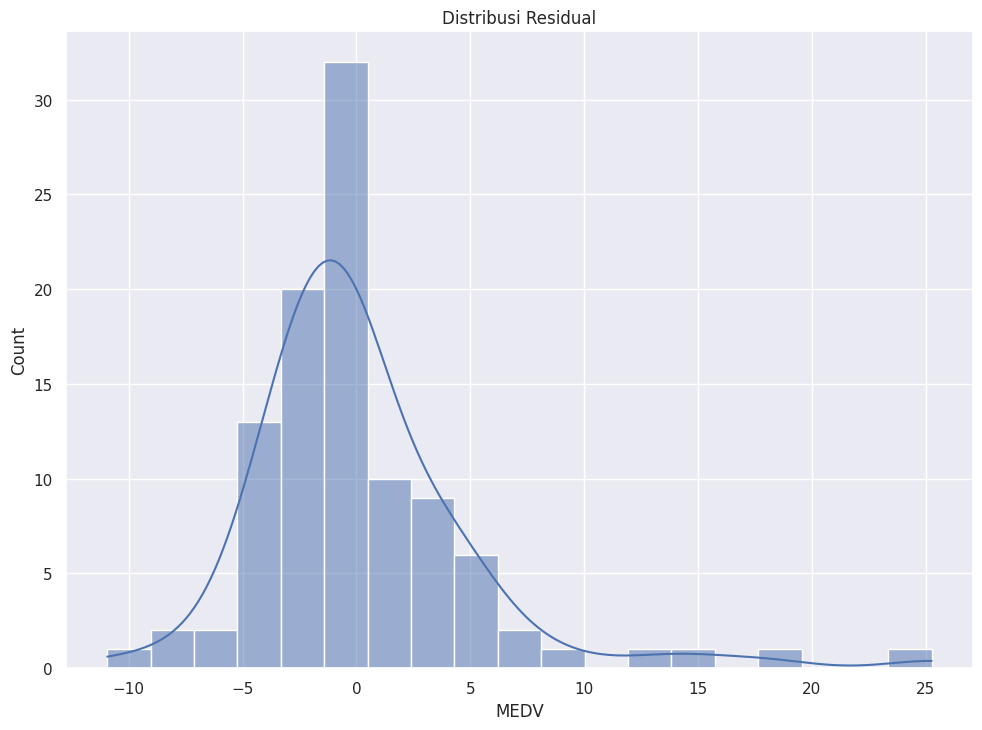

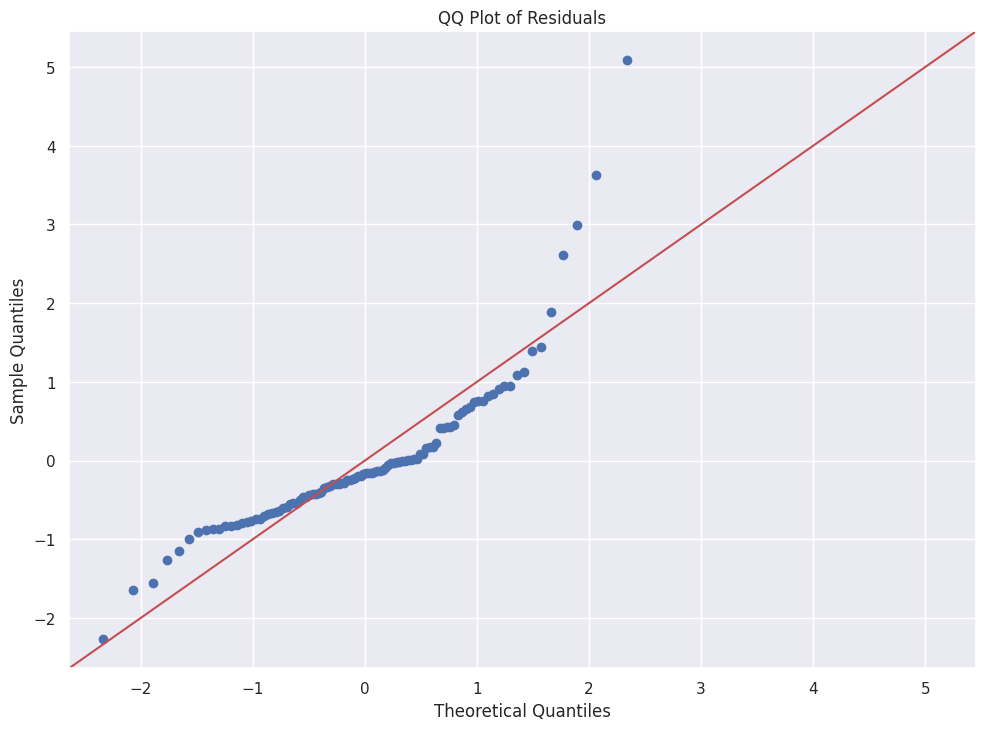

In [14]:
# Residuals dihitung sebagai selisih antara nilai aktual (y_test) dan nilai prediksi (y_pred)
# Plot ini digunakan untuk melihat sebaran residual. Idealnya, residuals harus tersebar acak di sekitar garis horizontal (nilai 0)
residuals = y_test - y_pred

# Residual Plot
# Membuat scatter plot untuk residuals terhadap nilai prediksi
# Sumbu X menunjukkan nilai prediksi dan sumbu Y menunjukkan residuals
plt.scatter(y_pred, residuals)
# Menambahkan garis horizontal pada nilai 0 untuk referensi
# Garis ini memudahkan visualisasi apakah residuals tersebar acak atau ada pola tertentu
plt.axhline(0, color='red', linestyle='--')
# Memberikan label pada sumbu X, Y, dan memberi judul pada plot
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
# Menampilkan plot residuals
plt.show()

# Distribusi Residual
# Plot histogram residuals untuk memeriksa distribusi residuals
# Dengan menambahkan kernel density estimate (KDE), kita bisa melihat apakah distribusi residuals mendekati distribusi normal
sns.histplot(residuals, kde=True)
# Memberikan judul pada distribusi residual
plt.title("Distribusi Residual")
# Menampilkan plot distribusi residuals
plt.show()

# QQ Plot of Residuals
# Plot QQ digunakan untuk memeriksa apakah residuals terdistribusi normal
# Jika data terdistribusi normal, titik-titik pada plot ini akan berada pada garis 45 derajat
sm.qqplot(residuals, line='45', fit=True)
# Memberikan judul pada QQ plot
plt.title("QQ Plot of Residuals")
# Menampilkan plot QQ residuals
plt.show()

## Prediksi Data Baru

In [15]:
# Membuat data baru dalam format dictionary dengan nilai-nilai contoh untuk setiap fitur
# Setiap kunci dalam dictionary adalah nama fitur, dan nilai berupa list yang berisi nilai untuk fitur tersebut
new_data = {
    'CRIM': [0.1],  # Contoh nilai untuk tingkat kriminalitas per capita (CRIM)
    'ZN': [18.0],   # Contoh nilai untuk proporsi area yang digunakan untuk perumahan dengan lebih dari 25,000 kaki persegi (ZN)
    'INDUS': [9.0], # Contoh nilai untuk proporsi area industri (INDUS)
    'CHAS': [1],     # Contoh nilai untuk apakah kawasan ini berada di dekat sungai atau tidak (1 = ada sungai, 0 = tidak ada sungai)
    'NOX': [0.5],    # Contoh nilai untuk konsentrasi nitrogen oksida per 10 juta (NOX)
    'RM': [6.5],     # Contoh nilai untuk rata-rata jumlah kamar tidur per rumah (RM)
    'AGE': [65.0],   # Contoh nilai untuk proporsi rumah yang dibangun sebelum tahun 1940 (AGE)
    'DIS': [4.0],    # Contoh nilai untuk jarak ke pusat kota Boston (DIS)
    'RAD': [4],      # Contoh nilai untuk aksesibilitas jalan raya (RAD)
    'TAX': [300.0],  # Contoh nilai untuk tarif pajak properti per 10,000 dolar (TAX)
    'PTRATIO': [18.0], # Contoh nilai untuk rasio murid terhadap guru di sekolah (PTRATIO)
    'B': [380.0],    # Contoh nilai untuk proporsi orang berkulit hitam per kota (B)
    'LSTAT': [8.0]   # Contoh nilai untuk persentase penduduk berstatus sosial-ekonomi rendah (LSTAT)
}

# Membuat DataFrame baru menggunakan data yang sudah didefinisikan sebelumnya
new_df = pd.DataFrame(new_data)

# Mengonversi kolom 'CHAS' menjadi tipe data float
# Ini dilakukan karena 'CHAS' sebelumnya berisi nilai integer, namun model regresi lebih baik dengan tipe data numerik (float)
new_df['CHAS'] = new_df['CHAS'].astype(float)

# Mengonversi kolom 'RAD' menjadi tipe data float, karena 'RAD' juga berisi angka yang lebih cocok untuk tipe data numerik (float)
new_df['RAD'] = new_df['RAD'].astype(float)

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     1 non-null      float64
 1   ZN       1 non-null      float64
 2   INDUS    1 non-null      float64
 3   CHAS     1 non-null      float64
 4   NOX      1 non-null      float64
 5   RM       1 non-null      float64
 6   AGE      1 non-null      float64
 7   DIS      1 non-null      float64
 8   RAD      1 non-null      float64
 9   TAX      1 non-null      float64
 10  PTRATIO  1 non-null      float64
 11  B        1 non-null      float64
 12  LSTAT    1 non-null      float64
dtypes: float64(13)
memory usage: 236.0 bytes


In [28]:
# Prediksi harga rumah (MEDV) menggunakan model yang telah dilatih
# 'model.predict()' digunakan untuk memprediksi harga rumah berdasarkan data fitur yang baru
# Kita buat DataFrame dari 'new_data' untuk mengirimkan data ke dalam format yang sesuai dengan model
# Model akan menggunakan koefisien yang telah dilatih sebelumnya untuk menghasilkan prediksi harga rumah

print("Prediksi MEDV untuk data baru:", model.predict(pd.DataFrame(new_data)))

Prediksi MEDV untuk data baru: [29.97809206]
